# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '3_July'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df = pd.read_parquet("top_players.parquet")

# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 1362
--------------------------------------------------
Number of unique visits in dtf: 25
--------------------------------------------------
Number of unique sessions in dtf: 9
--------------------------------------------------


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per session:')
print(df_s.groupby(['clasification', 'session_time'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')

Categories of wins in a row per session:
                               #2ws    #3ws   #4ws
clasification session_time                        
top_1         1              5882.0  1099.0  342.0
              2              3395.0   615.0  227.0
              3              1514.0   306.0  108.0
              4               770.0   174.0   62.0
              5               380.0    45.0   16.0
              6               192.0    15.0    8.0
              7                58.0    18.0    4.0
              8                 0.0     1.0    0.0
top_10        1              7586.0  1413.0  434.0
              2              3042.0   551.0  162.0
              3              1015.0   190.0   66.0
              4               343.0    51.0   18.0
              5                74.0    14.0    4.0
              6                15.0     4.0    2.0
              7                 7.0     3.0    1.0
top_5         1             10962.0  2142.0  638.0
              2              4796.0   920

In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Categories of wins in a row per visit:
                       #2ws    #3ws   #4ws
clasification visit                       
top_1         1      3391.0   669.0  216.0
              2      3773.0   660.0  253.0
              3      2399.0   413.0  146.0
              4      1137.0   225.0   52.0
              5       428.0    84.0   34.0
              6       171.0    30.0    5.0
              7       148.0    44.0   11.0
              8       157.0    32.0   16.0
              9       125.0    26.0   12.0
              10       70.0    21.0    9.0
              11       47.0    11.0    2.0
              12       47.0    14.0    3.0
              13       27.0     5.0    0.0
              14       40.0     0.0    0.0
              15       47.0     7.0    3.0
              16        7.0     2.0    1.0
              17       36.0     3.0    0.0
              18       34.0     7.0    0.0
              19       40.0    10.0    2.0
              20        2.0     0.0    0.0
              2

### Gender Differences

In [10]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  gender
top_1          F          66
               M          71
top_10         F         332
               M         349
top_5          F         258
               M         286
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [11]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

df_s['age_range'] = pd.cut(df_s['age'], bins=bins, labels=labels, right=False)
df_s['age_gen'] = pd.cut(df_s['age'], bins=bins, labels=generations, right=False)

In [12]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:
clasification  age_range
top_1          18-24          0
               25-40         13
               41-55         55
               56-75         67
               76+            2
top_10         18-24          4
               25-40        142
               41-55        272
               56-75        235
               76+           28
top_5          18-24          2
               25-40         89
               41-55        229
               56-75        208
               76+           16
Name: playerkey, dtype: int64
--------------------------------------------------


In [13]:
# Age range differences
print("Number of unique players in dtf:")
print(df_s.groupby(['clasification', 'age_gen'])['playerkey'].nunique())

Number of unique players in dtf:
clasification  age_gen     
top_1          Gen Z             0
               Millenials       13
               Gen X            55
               Baby Boomers     67
               Silent            2
top_10         Gen Z             4
               Millenials      142
               Gen X           272
               Baby Boomers    235
               Silent           28
top_5          Gen Z             2
               Millenials       89
               Gen X           229
               Baby Boomers    208
               Silent           16
Name: playerkey, dtype: int64


In [14]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_gen'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  age_gen     
top_1          Gen Z             0
               Millenials       13
               Gen X            55
               Baby Boomers     67
               Silent            2
top_10         Gen Z             4
               Millenials      142
               Gen X           272
               Baby Boomers    235
               Silent           28
top_5          Gen Z             2
               Millenials       89
               Gen X           229
               Baby Boomers    208
               Silent           16
Name: playerkey, dtype: int64
--------------------------------------------------


Male age differences in dtf:
age_range
18-24      4
25-40    150
41-55    287
56-75    238
76+       27
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24      2
25-40     94
41-55    269
56-75    272
76+       19
Name: playerkey, dtype: int64


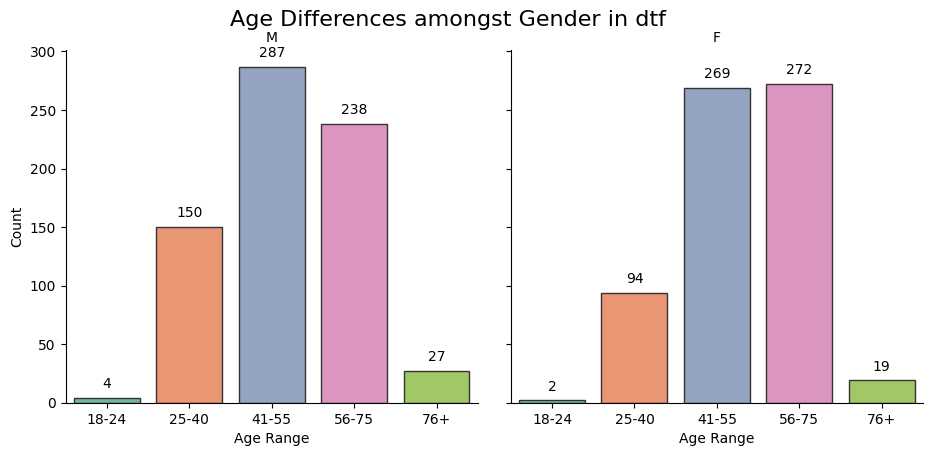

In [15]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [16]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")


Count of players who increase_slotdeno : 1109
Count of times each player increase_slotdeno : {33: 66, 199: 1, 224: 10, 795: 14, 865: 1, 982: 17, 1008: 13, 1013: 5, 1035: 16, 1036: 16, 1141: 22, 1166: 28, 1171: 49, 1233: 44, 1331: 12, 1483: 5, 1496: 5, 1513: 8, 2044: 22, 2065: 4, 2070: 1, 2073: 7, 2319: 9, 2368: 3, 2768: 11, 2950: 41, 3283: 3, 3399: 188, 3436: 15, 3546: 19, 3749: 4, 3825: 1, 4067: 12, 4106: 8, 4265: 14, 4333: 16, 4483: 41, 4758: 2, 4819: 17, 4919: 2, 4971: 21, 5046: 29, 5334: 20, 5561: 1, 5563: 96, 5673: 7, 5676: 25, 5692: 22, 5822: 515, 6014: 1, 6018: 4, 6053: 3, 6194: 6, 6232: 2, 6451: 11, 6498: 7, 6708: 6, 6719: 6, 6720: 11, 6760: 9, 6767: 10, 6769: 4, 6838: 4, 6908: 8, 7058: 32, 7100: 9, 7122: 6, 7257: 3, 7695: 10, 7967: 2, 8116: 90, 8220: 21, 8385: 2, 8412: 11, 8467: 1, 8647: 61, 8648: 115, 8968: 25, 8978: 12, 9087: 5, 9138: 25, 9222: 9, 9269: 10, 9372: 13, 9382: 12, 9383: 10, 9396: 32, 9434: 4, 9570: 9, 9640: 127, 9788: 762, 10090: 5, 10106: 169, 10177: 1, 10638: 

In [17]:
# Lets do the same but for df_s
players_increase_slot_s = cf.count_increase(df_s, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_s = cf.count_decrease(df_s, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_s = cf.count_increase(df_s, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_s = cf.count_decrease(df_s, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 1109
Count of times each player increase_slotdeno : {33: 66, 199: 1, 224: 10, 795: 14, 865: 1, 982: 17, 1008: 13, 1013: 5, 1035: 16, 1036: 16, 1141: 22, 1166: 28, 1171: 49, 1233: 44, 1331: 12, 1483: 5, 1496: 5, 1513: 8, 2044: 22, 2065: 4, 2070: 1, 2073: 7, 2319: 9, 2368: 3, 2768: 11, 2950: 41, 3283: 3, 3399: 188, 3436: 15, 3546: 19, 3749: 4, 3825: 1, 4067: 12, 4106: 8, 4265: 14, 4333: 16, 4483: 41, 4758: 2, 4819: 17, 4919: 2, 4971: 21, 5046: 29, 5334: 20, 5561: 1, 5563: 96, 5673: 7, 5676: 25, 5692: 22, 5822: 515, 6014: 1, 6018: 4, 6053: 3, 6194: 6, 6232: 2, 6451: 11, 6498: 7, 6708: 6, 6719: 6, 6720: 11, 6760: 9, 6767: 10, 6769: 4, 6838: 4, 6908: 8, 7058: 32, 7100: 9, 7122: 6, 7257: 3, 7695: 10, 7967: 2, 8116: 90, 8220: 21, 8385: 2, 8412: 11, 8467: 1, 8647: 61, 8648: 115, 8968: 25, 8978: 12, 9087: 5, 9138: 25, 9222: 9, 9269: 10, 9372: 13, 9382: 12, 9383: 10, 9396: 32, 9434: 4, 9570: 9, 9640: 127, 9788: 762, 10090: 5, 10106: 169, 10177: 1, 10638: 

### Wealth Differences
#### General

In [18]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)

# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_s['depletion_rate'] = df_s.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


#### Per Visit

In [19]:
# Create dataframe for Machine Learning model
df_ML_v = pf.transform_ml(data_b=df, grouping='visit')

In [20]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  1362
Number of discrepancies: 56
Number of unique players w/o discrepancies:  1306


In [21]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_players_ending_balance_by_visit.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [22]:
df_ML_s = pf.transform_ml(data_b=df_s, grouping='session_time')

In [23]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  1362
Number of discrepancies: 53
Number of unique players w/o discrepancies:  1309


In [24]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_player_ending_balance_by_session.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '